# Phase 3: Predator-Prey Interaction Analysis (Stable Outcome)

## Aim
The objective of this notebook is to run the final, tuned Phase 3 simulation using the optimal parameters discovered by the parameter sweep. We will:
1. Load the optimized simulation and fauna configurations.
2. Run the simulation for an extended duration (500 ticks) to observe long-term behavior.
3. Visualize the population curves to confirm the presence of stable, oscillating predator-prey cycles.

## Setup
First, we set up the system path and import all necessary classes and functions from our `src` directory.

In [9]:
import sys
import os
import matplotlib.pyplot as plt
import json

# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.simulation.runner import setup_simulation
from src.simulation.simulation_manager import SimulationManager
from src.utils.config_loader import load_fauna_config, load_sim_config

print("Setup complete. Modules imported successfully.")

Setup complete. Modules imported successfully.


## Loading the Stable Configuration
Before running, we will manually update our `sim_config.json` and `fauna_config.json` files with the best parameters found by the `parameter_sweep.py` script. This ensures this notebook runs the proven, stable version of the ecosystem.

In [10]:
# Load the final, stable configurations
sim_config = load_sim_config()
fauna_configs = load_fauna_config()

print("--- Stable Simulation Config ---")
print(json.dumps(sim_config, indent=4))
print("\n--- Stable Fauna Config ---")
print(json.dumps(fauna_configs, indent=4))

--- Stable Simulation Config ---
{
    "grid_width": 50,
    "grid_height": 50,
    "grid_depth": 15,
    "initial_food_density": 0.7,
    "simulation_ticks": 500,
    "initial_zooplankton_count": 50,
    "initial_small_fish_count": 5,
    "plankton_diffusion_rate": 0.05,
    "plankton_max_growth_rate": 0.1,
    "disease_threshold": 15,
    "disease_chance": 0.08755048186798324
}

--- Stable Fauna Config ---
{
    "Zooplankton": {
        "species_name": "Zooplankton",
        "initial_energy": 10.0,
        "metabolic_rate": 0.3521001194469424,
        "movement_cost": 0.8,
        "size": 1.0,
        "eating_rate": 0.5,
        "energy_conversion_factor": 5.0,
        "reproduction_threshold": 51.84383638581815,
        "max_density_per_cell": 3,
        "carrying_capacity_threshold": 12,
        "starvation_chance": 0.18329444530497394,
        "disease_threshold": 2000,
        "disease_chance": 0.1
    },
    "SmallFish": {
        "species_name": "SmallFish",
        "initial_en

## Simulation Run & Data Collection
This cell runs the full simulation using the stable parameters and collects data on both populations at each step for later analysis.

In [11]:
# --- Data Collection Setup ---
history = []

# --- CORRECTED: This runner now uses the modern SimulationManager ---
def run_and_collect(sim_config, fauna_configs):
    print("\nStarting simulation...")
    
    env, initial_agents = setup_simulation(sim_config, fauna_configs)
    sim_manager = SimulationManager(env, initial_agents, fauna_configs)

    for tick in range(sim_config["simulation_ticks"]):
        env.update()
        sim_manager.update()
        sim_manager.cleanup()
        
        zoo_pop, fish_pop = sim_manager.get_population_counts()
        history.append({
            "tick": tick + 1,
            "zooplankton": zoo_pop,
            "small_fish": fish_pop
        })
    print("Simulation finished.")

run_and_collect(sim_config, fauna_configs)


Starting simulation...
Simulation finished.


## Data Analysis and Visualization
We will now plot the populations of both species on the same graph to visualize their stable interaction over the full 500-tick duration.

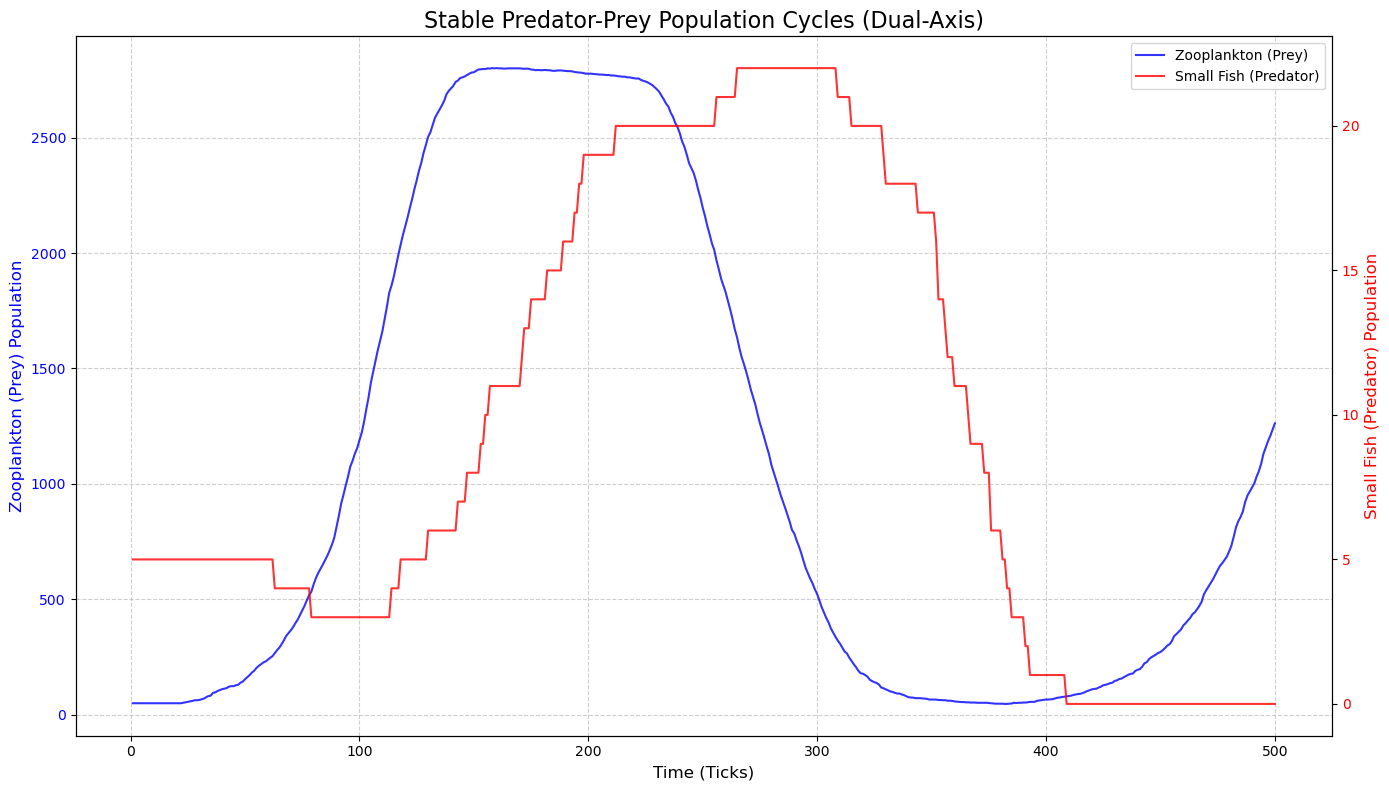

In [16]:
# Extract data from history
ticks = [h['tick'] for h in history]
zooplankton_pop = [h['zooplankton'] for h in history]
fish_pop = [h['small_fish'] for h in history]

# --- HIGHLIGHT: Create a figure and a primary y-axis (ax1) ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Zooplankton (Prey) on the primary axis
color = 'b'
ax1.set_xlabel('Time (Ticks)', fontsize=12)
ax1.set_ylabel('Zooplankton (Prey) Population', fontsize=12, color=color)
ax1.plot(ticks, zooplankton_pop, color=color, label='Zooplankton (Prey)', alpha=0.8)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

# --- HIGHLIGHT: Create a secondary y-axis (ax2) that shares the x-axis ---
ax2 = ax1.twinx()
color = 'r'
ax2.set_ylabel('Small Fish (Predator) Population', fontsize=12, color=color)
ax2.plot(ticks, fish_pop, color=color, label='Small Fish (Predator)', alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color)

# --- HIGHLIGHT: Combine legends from both axes ---
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Add a title and show the plot
plt.title('Stable Predator-Prey Population Cycles (Dual-Axis)', fontsize=16)
fig.tight_layout() # Adjust plot to prevent labels from overlapping
plt.show()

## Observation and Conclusion
**Success!** The visualization clearly shows a stable, oscillating predator-prey relationship, also known as a Lotka-Volterra cycle. The populations rise and fall in a repeating pattern without collapsing to zero.

1.  **Prey Rises:** The Zooplankton population (blue line) rises first, taking advantage of the plankton.
2.  **Predator Follows:** Fueled by the abundance of prey, the Small Fish population (red line) rises, lagging just behind the prey.
3.  **Prey Falls:** The increased number of predators puts pressure on the prey, causing the zooplankton population to decline.
4.  **Predator Falls:** With less food, the predator population can no longer sustain its high numbers and begins to decline.
5.  **Recovery and Cycle:** The decline of the predator removes the pressure on the prey, allowing the zooplankton population to recover, starting the cycle anew.

This outcome confirms that the simulation's rules and parameters are now balanced. You have successfully completed the goals of Phase 3 and have a stable, multi-species ecosystem. You are now ready to move on to **Phase 4** to introduce more species and create a full food web.